In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from prophet import Prophet
from datetime import datetime
from statsmodels.tsa.seasonal import STL
from statsmodels.tools.sm_exceptions import ValueWarning
from statsmodels.graphics.tsaplots import plot_acf
import warnings

warnings.simplefilter(action='ignore', category=ValueWarning)

c:\Users\jason\anaconda3\envs\playground\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
#load canola data
data = pd.read_csv('https://raw.githubusercontent.com/Metaluv/Palette_Training/main/Palette_Training_5-main/data/canola.csv')

In [50]:
data = data.rename(columns={'Date': 'ds', 'Canola 1CAN ($ per tonne)': 'y'})
data['ds'] = pd.to_datetime(data['ds'])


In [51]:
model = Prophet()
model.fit(data)


2023-03-19 17:35:58.324 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-03-19 17:35:58.374 DEBUG   cmdstanpy: TBB already found in load path
2023-03-19 17:35:58.381 INFO    prophet: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2023-03-19 17:35:58.396 DEBUG   cmdstanpy: input tempfile: C:\Users\jason\AppData\Local\Temp\tmp60z2_fdf\apbp4gtq.json
2023-03-19 17:35:58.468 DEBUG   cmdstanpy: input tempfile: C:\Users\jason\AppData\Local\Temp\tmp60z2_fdf\h2plzw4c.json
2023-03-19 17:35:58.469 DEBUG   cmdstanpy: idx 0
2023-03-19 17:35:58.470 DEBUG   cmdstanpy: running CmdStan, num_threads: None
2023-03-19 17:35:58.470 DEBUG   cmdstanpy: CmdStan args: ['C:\\Users\\jason\\anaconda3\\envs\\playground\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=57647', 'data', 'file=C:\\Users\\jason\\AppData\\Local\\Temp\\tmp60z2_fdf\\apbp4gtq.json', 'init=C:\\Users\\jason\\AppData\\Local\\Temp\\tmp60z2_fdf\\h2plzw4c.json', 'output'

In [80]:
# Define the period you want to forecast (e.g., 365 days)
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)


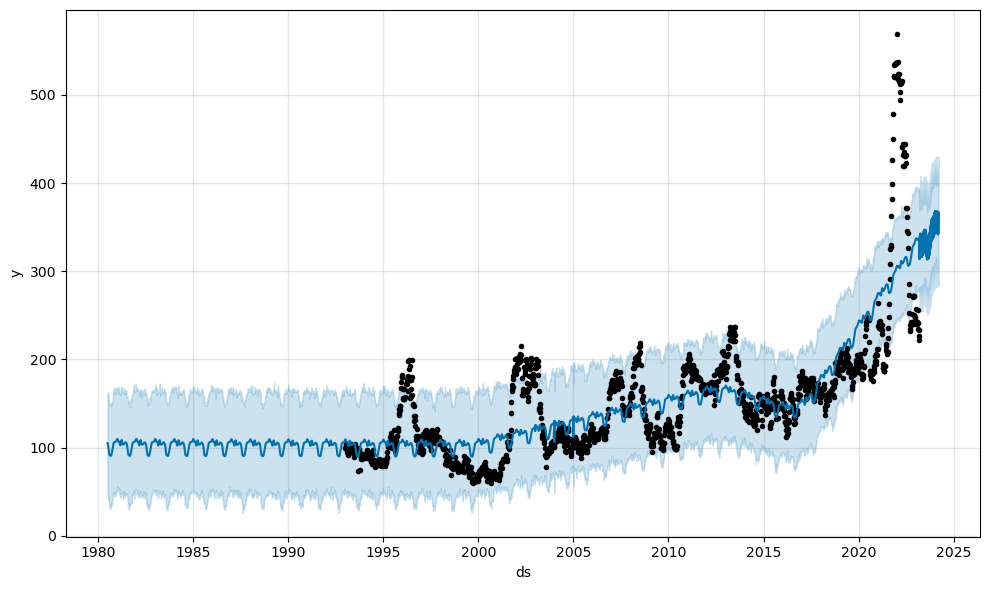

In [79]:
fig = model.plot(forecast)


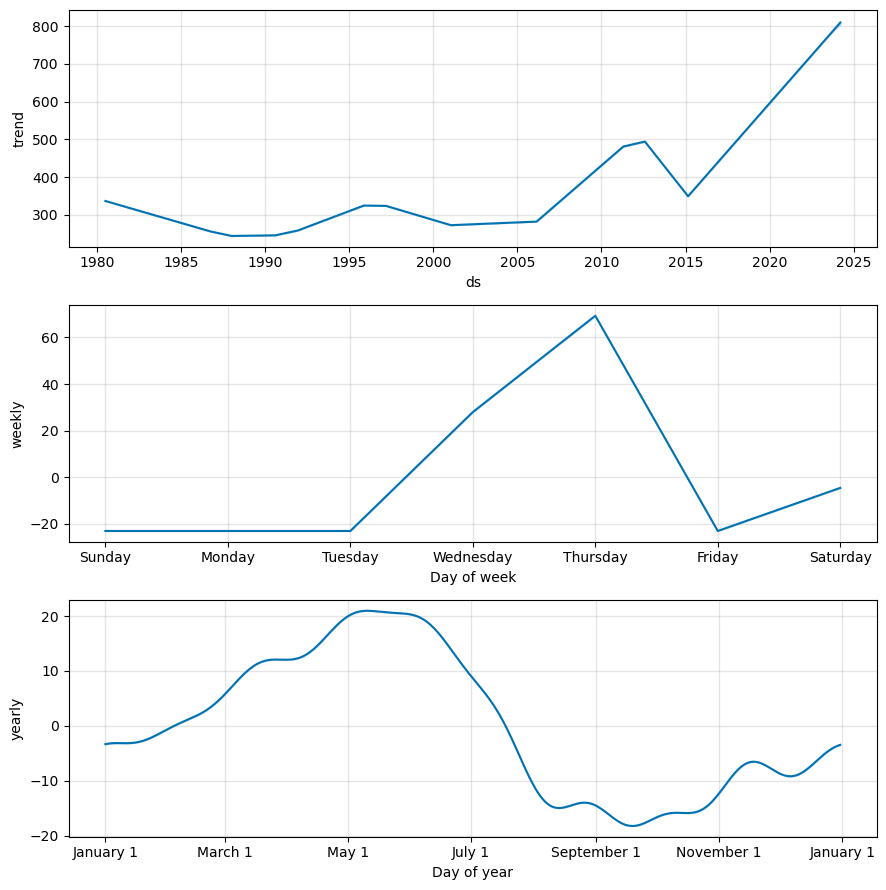

In [54]:
fig_components = model.plot_components(forecast)


In [55]:
import plotly.graph_objs as go

# Extract the relevant data from the forecast DataFrame
forecast_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Create a line plot for the actual data points
actual_data_trace = go.Scatter(
    x=data['ds'],
    y=data['y'],
    mode='lines',
    name='Actual Data',
    line=dict(color='blue')
)

# Create a line plot for the forecast data points
forecast_trace = go.Scatter(
    x=forecast_data['ds'],
    y=forecast_data['yhat'],
    mode='lines',
    name='Forecast',
    line=dict(color='red')
)

# Create uncertainty interval for the forecast
lower_bound_trace = go.Scatter(
    x=forecast_data['ds'],
    y=forecast_data['yhat_lower'],
    mode='lines',
    name='Lower Bound',
    line=dict(color='rgba(255,0,0,0.2)'),
    showlegend=False
)

upper_bound_trace = go.Scatter(
    x=forecast_data['ds'],
    y=forecast_data['yhat_upper'],
    mode='lines',
    name='Upper Bound',
    fill='tonexty',
    line=dict(color='rgba(255,0,0,0.2)'),
    showlegend=False
)

# Combine all traces and plot the figure
data_to_plot = [actual_data_trace, forecast_trace, lower_bound_trace, upper_bound_trace]
layout = go.Layout(title='Canola 1CAN Forecast', xaxis=dict(title='Date'), yaxis=dict(title='Price per tonne'))
fig = go.Figure(data=data_to_plot, layout=layout)
fig.show()


In [68]:
import requests
import pandas as pd
from io import StringIO

def fetch_crop_data(crop):
    base_url = "https://raw.githubusercontent.com/Metaluv/Palette_Training/main/Palette_Training_5-main/data/"
    
    crop_file_map = {
        'Winter Wheat': 'wheat.csv',
        'Canola': 'canola.csv',
        'Spring Wheat': 'wheat.csv',
        'Oats': 'oats.csv',
        'Barley': 'barley.csv',
        'Fall Rye': 'fall_rye.csv',
        'Flax': 'flax.csv',
    }
    
    filename = crop_file_map[crop]
    url = base_url + filename
    
    response = requests.get(url)
    response.raise_for_status()
    
    data = pd.read_csv(StringIO(response.text))
    
    return data


In [70]:
fetch_crop_data('Oats')

,Date,Oats 2CW ($ per tonne)
0,1980-07-02,NaN
1,1980-07-09,NaN
2,1980-07-16,NaN
3,1980-07-23,NaN
4,1980-07-30,NaN
...,...,...
2223,2023-02-15,234.84
2224,2023-02-22,255.93
2225,2023-03-01,233.75
2226,2023-03-08,226.50


In [65]:
data = fetch_crop_data('Oats')

In [71]:
data = data.rename(columns={'Date': 'ds', 'Oats 2CW ($ per tonne)': 'y'})
data['ds'] = pd.to_datetime(data['ds'])

In [72]:
model = Prophet()
model.fit(data)


2023-03-19 17:58:30.686 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-03-19 17:58:30.734 DEBUG   cmdstanpy: TBB already found in load path
2023-03-19 17:58:30.741 INFO    prophet: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2023-03-19 17:58:30.753 DEBUG   cmdstanpy: input tempfile: C:\Users\jason\AppData\Local\Temp\tmp60z2_fdf\r6rwmvke.json
2023-03-19 17:58:30.802 DEBUG   cmdstanpy: input tempfile: C:\Users\jason\AppData\Local\Temp\tmp60z2_fdf\ovrzvkd1.json
2023-03-19 17:58:30.803 DEBUG   cmdstanpy: idx 0
2023-03-19 17:58:30.803 DEBUG   cmdstanpy: running CmdStan, num_threads: None
2023-03-19 17:58:30.803 DEBUG   cmdstanpy: CmdStan args: ['C:\\Users\\jason\\anaconda3\\envs\\playground\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=72118', 'data', 'file=C:\\Users\\jason\\AppData\\Local\\Temp\\tmp60z2_fdf\\r6rwmvke.json', 'init=C:\\Users\\jason\\AppData\\Local\\Temp\\tmp60z2_fdf\\ovrzvkd1.json', 'output'

In [73]:
# Define the period you want to forecast (e.g., 365 days)
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)


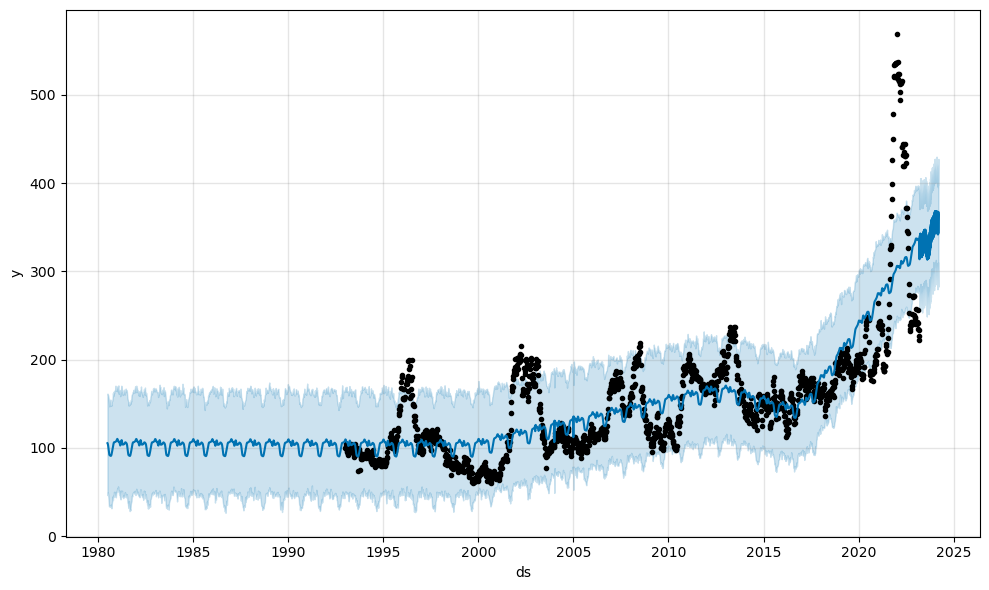

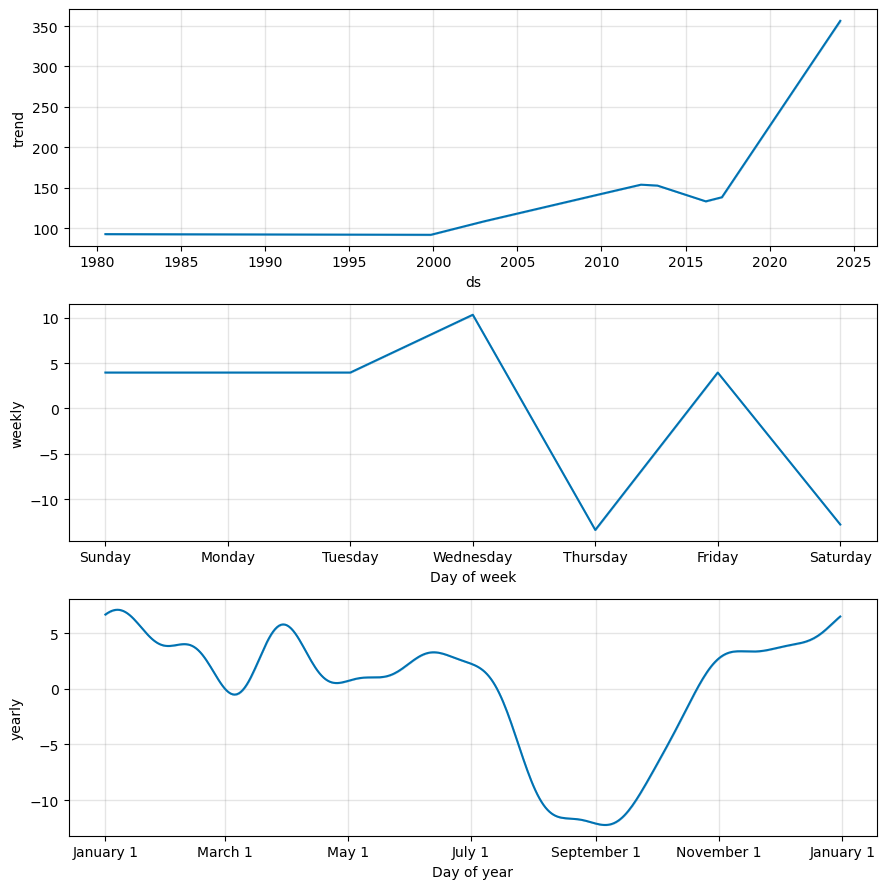

In [74]:
fig = model.plot(forecast)
fig_components = model.plot_components(forecast)


In [75]:

# Extract the relevant data from the forecast DataFrame
forecast_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Create a line plot for the actual data points
actual_data_trace = go.Scatter(
    x=data['ds'],
    y=data['y'],
    mode='lines',
    name='Actual Data',
    line=dict(color='blue')
)

# Create a line plot for the forecast data points
forecast_trace = go.Scatter(
    x=forecast_data['ds'],
    y=forecast_data['yhat'],
    mode='lines',
    name='Forecast',
    line=dict(color='red')
)

# Create uncertainty interval for the forecast
lower_bound_trace = go.Scatter(
    x=forecast_data['ds'],
    y=forecast_data['yhat_lower'],
    mode='lines',
    name='Lower Bound',
    line=dict(color='rgba(255,0,0,0.2)'),
    showlegend=False
)

upper_bound_trace = go.Scatter(
    x=forecast_data['ds'],
    y=forecast_data['yhat_upper'],
    mode='lines',
    name='Upper Bound',
    fill='tonexty',
    line=dict(color='rgba(255,0,0,0.2)'),
    showlegend=False
)

# Combine all traces and plot the figure
data_to_plot = [actual_data_trace, forecast_trace, lower_bound_trace, upper_bound_trace]
layout = go.Layout(title='Canola 1CAN Forecast', xaxis=dict(title='Date'), yaxis=dict(title='Price per tonne'))
fig = go.Figure(data=data_to_plot, layout=layout)
fig.show()

In [81]:
def load_crop_data(crop):
    base_url = 'https://raw.githubusercontent.com/Metaluv/Palette_Training/main/Palette_Training_5-main/data/'
    crop_filename = {
        'Winter Wheat': 'wheat.csv',
        'Canola': 'canola.csv',
        'Spring Wheat': 'wheat.csv',
        'Oats': 'oats.csv',
        'Barley': 'barley.csv',
        'Fall Rye': 'mustard.csv',
        'Flax': 'flax.csv'
    }
    file_url = base_url + crop_filename[crop]
    data = pd.read_csv(file_url)
    return data


2023-03-19 18:13:53.693 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2023-03-19 18:13:53.744 DEBUG   cmdstanpy: TBB already found in load path
2023-03-19 18:13:53.752 INFO    prophet: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2023-03-19 18:13:53.764 DEBUG   cmdstanpy: input tempfile: C:\Users\jason\AppData\Local\Temp\tmp60z2_fdf\eax02x88.json
2023-03-19 18:13:53.833 DEBUG   cmdstanpy: input tempfile: C:\Users\jason\AppData\Local\Temp\tmp60z2_fdf\jzoaec8_.json
2023-03-19 18:13:53.835 DEBUG   cmdstanpy: idx 0
2023-03-19 18:13:53.836 DEBUG   cmdstanpy: running CmdStan, num_threads: None
2023-03-19 18:13:53.836 DEBUG   cmdstanpy: CmdStan args: ['C:\\Users\\jason\\anaconda3\\envs\\playground\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=61443', 'data', 'file=C:\\Users\\jason\\AppData\\Local\\Temp\\tmp60z2_fdf\\eax02x88.json', 'init=C:\\Users\\jason\\AppData\\Local\\Temp\\tmp60z2_fdf\\jzoaec8_.json', 'output'

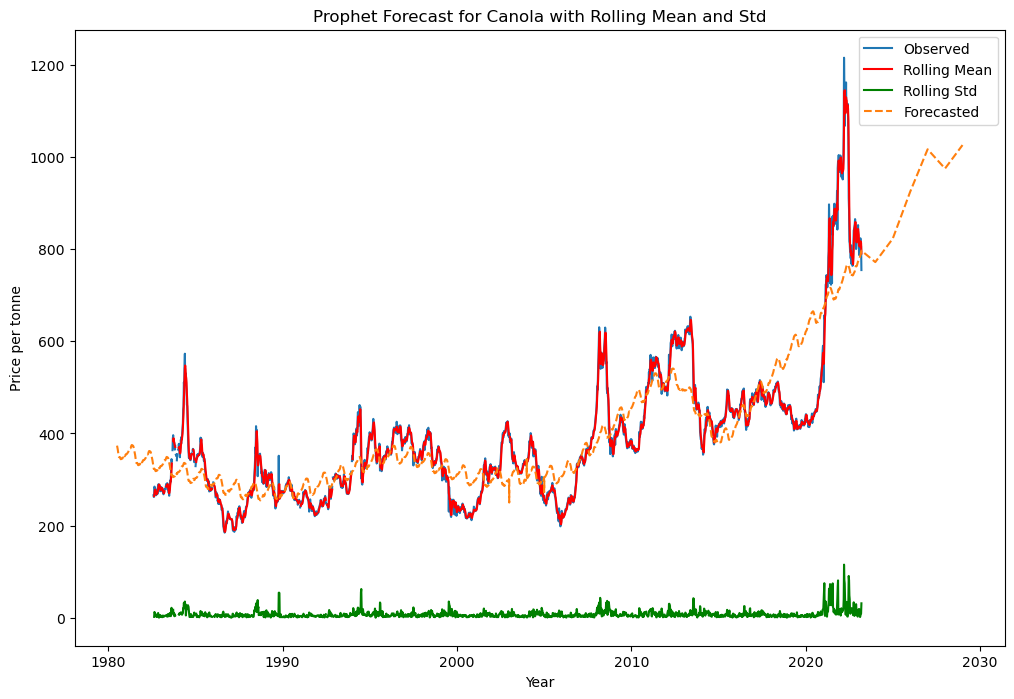

In [83]:
def plot_forecast(crop, window=3):
    data = load_crop_data(crop)
    series = data[['Date', f'{crop} 1CAN ($ per tonne)']]
    series.columns = ['ds', 'y']
    series['ds'] = pd.to_datetime(series['ds'])

    rolling_mean = series['y'].rolling(window=window).mean()
    rolling_std = series['y'].rolling(window=window).std()

    model = Prophet()
    model.fit(series)
    future = model.make_future_dataframe(periods=(2027 - 2022 + 1), freq='Y')
    forecast = model.predict(future)

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(series['ds'], series['y'], label='Observed')
    ax.plot(series['ds'], rolling_mean, label='Rolling Mean', color='red')
    ax.plot(series['ds'], rolling_std, label='Rolling Std', color='green')
    ax.plot(future['ds'], forecast['yhat'], label='Forecasted', linestyle='--')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'Price per tonne')
    ax.set_title(f'Prophet Forecast for {crop} with Rolling Mean and Std')
    plt.legend()
    return fig

crop = 'Canola'
fig = plot_forecast(crop)
plt.show()